# **Project Name**    - Online Retail (Clustering) Project



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Parth Khera**

# **Project Summary -**

**Summary: Online Retail Data Analysis Project**

  The Online Retail Data Analysis project aimed to explore transactional data from an e-commerce business to gain insights into customer purchasing behavior, product performance, and sales trends over time. The ultimate goal was to enable data-driven business decisions to improve marketing strategies, inventory management, and customer segmentation.

**Data Preparation and Cleaning:**

  The project began with thorough data preprocessing. The raw dataset contained various features including invoice details, product descriptions, quantities sold, unit prices, and customer locations. Initial steps involved handling missing values, removing duplicate entries, and correcting data inconsistencies such as negative quantities or erroneous invoices. This cleaning process ensured that subsequent analyses were performed on reliable data.

  Feature engineering was also an essential step. New variables were created to facilitate deeper insights — for example, calculating total revenue per transaction by multiplying quantity and unit price, and extracting time components like month, day, hour, and weekday from invoice timestamps. These time-based features helped analyze seasonal and hourly sales patterns.

**Exploratory Data Analysis (EDA):**

  EDA revealed several important trends in the dataset:

- **Country-wise sales:** The United Kingdom emerged as the largest market in terms of quantity sold and overall revenue. Other countries showed significantly lower sales volumes, suggesting a need for region-specific strategies.

- **Top-selling products:** Analysis of product descriptions highlighted a small subset of items that dominated sales volumes. These products could be targeted for inventory prioritization and promotional campaigns.

- **Sales seasonality:** Monthly sales trends demonstrated clear peaks during holiday seasons, particularly in November and December, likely driven by festive shopping and promotional discounts. Identifying these spikes helps the business prepare stock and marketing campaigns in advance.

- **Hourly sales patterns:** Sales volume varied throughout the day, with higher activity seen during late morning and early evening hours. This insight could optimize staffing and advertising schedules.

- **Frequent products ordered:** Some products appeared consistently across orders, indicating their popularity and customer loyalty.

**Correlation and Relationship Insights:**

  To understand relationships among numerical variables such as quantity, unit price, and revenue, correlation matrices and pair plots were used. These visualizations indicated:

  A generally weak correlation between quantity and unit price, suggesting bulk buying often involves discounted pricing.

  Strong positive correlations between revenue and both quantity and unit price, which is expected given revenue is derived from these two factors.

  Minimal correlation between sales quantity and specific time components, implying that while there are peak hours and months, sales patterns are not strictly dependent on time of day or minute.

**Customer Segmentation Using Clustering:**

  To segment customers based on purchase behavior, clustering techniques were applied:

- **KMeans Clustering:** Provided meaningful groups but showed a moderate silhouette score (~0.7903), indicating some overlap among clusters.

- **Agglomerative Clustering:** Performed better with a higher silhouette score (~0.9308), suggesting clearer and more distinct customer segments.

  These clusters can be leveraged for targeted marketing, personalized offers, and loyalty programs to enhance customer retention and lifetime value.

**Advanced Techniques and Data Quality:**

- **Outlier Detection Using IQR:** The Interquartile Range technique helped identify and remove extreme values that could distort model performance or analysis outcomes.

- **Text Vectorization (TF-IDF):** For any textual analysis (e.g., product descriptions), TF-IDF vectorization converted text into meaningful numerical features, emphasizing important words and reducing noise from common terms.

**Business Impact and Future Directions:**

  This analysis provides actionable insights that can improve business decisions in several ways:

- **Inventory Management:** Knowing top products and seasonal peaks supports better stock planning.

- **Marketing Optimization:** Time-of-day and seasonal sales insights enable smarter campaign scheduling.

- **Customer Targeting:** Clustering helps design personalized promotions that increase engagement and sales.

- **Revenue Growth:** Understanding price-quantity relationships guides effective discounting strategies.

  For future work, integrating additional customer data such as demographics, browsing behavior, and feedback would enrich insights. Also, predictive modeling to forecast demand or identify churn risk could further enhance strategic planning.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The goal of this project is to analyze an online retail dataset to uncover meaningful insights about customer purchasing behavior, product trends, and seasonal sales patterns. The business faces challenges in understanding which products drive sales, identifying key customer segments, and optimizing inventory and marketing strategies. By applying data analysis and clustering techniques, the project aims to support data-driven decisions that improve customer targeting and overall business performance.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/Copy of Online Retail.xlsx - Online Retail.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count

# Dataset Duplicate Value Count
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If duplicates exist, remove them
if duplicate_rows > 0:
    data.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New number of rows: {data.shape[0]}")

Number of duplicate rows: 5268
Duplicates removed. New number of rows: 536641


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


<Axes: >

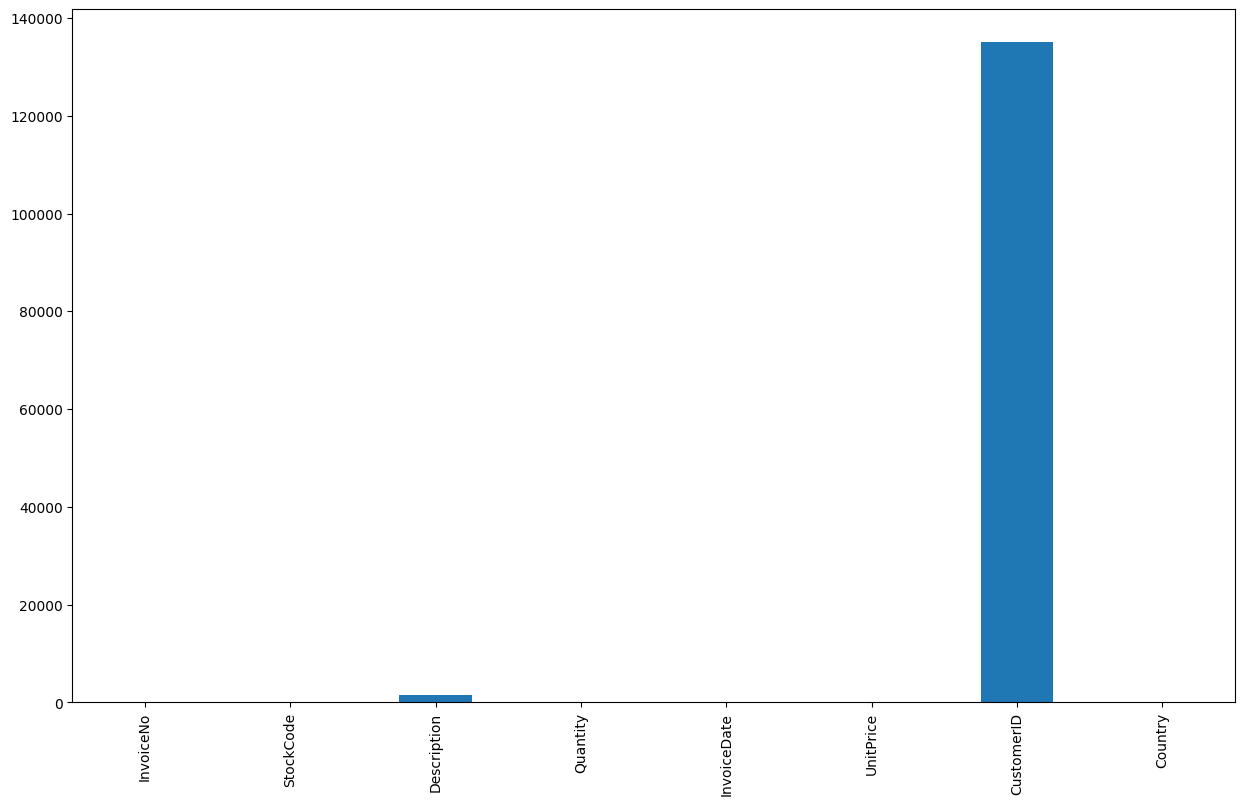

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,9))
data.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

1. We know dataset is about Online Retail.

2. We have 541909 row and 8 column.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

- Invoice No.: A unique identifier for each transaction.
- Stock Code: A product/item code used to uniquely identify each product sold.
- Description: A textual description of the product/item.
- Quantity: The number of units of the product purchased in that transaction row.
- InvoiceDate: The timestamp of the transaction.
- UnitPrice: The price per unit of the product.
- CustomerID: A unique identifier for each customer.
- Country: The country of the customer who made the purchase.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print(f"No. of unique values in", i, "are", data[i].nunique())


No. of unique values in InvoiceNo are 25900
No. of unique values in StockCode are 4070
No. of unique values in Description are 4223
No. of unique values in Quantity are 722
No. of unique values in InvoiceDate are 23260
No. of unique values in UnitPrice are 1630
No. of unique values in CustomerID are 4372
No. of unique values in Country are 38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df = data.copy()

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df["Invoice_year"] = df["InvoiceDate"].dt.year
df["Invoice_month"] = df["InvoiceDate"].dt.month
df["Invoice_day"] = df["InvoiceDate"].dt.day
df["Invoice_hour"] = df["InvoiceDate"].dt.hour
df["Invoice_minute"] = df["InvoiceDate"].dt.minute

df['Invoice_month_name'] = df['InvoiceDate'].dt.month_name()
df['Invoice_day_name'] = df['InvoiceDate'].dt.day_name()


In [ ]:
# Remove rows with null CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove rows with null Description
df.dropna(subset=['Description'], inplace=True)

In [ ]:
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

In [ ]:
print("Dataset after cleaning:")
display(df.head())
print(f'\nShape of the dataset after cleaning: {df.shape}')
print(f'\nMissing values after cleaning:\n{df.isnull().sum()}')

Dataset after cleaning:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_day,Invoice_hour,Invoice_minute,Invoice_month_name,Invoice_day_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday



Shape of the dataset after cleaning: (392692, 15)

Missing values after cleaning:
InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
Invoice_year          0
Invoice_month         0
Invoice_day           0
Invoice_hour          0
Invoice_minute        0
Invoice_month_name    0
Invoice_day_name      0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           392692 non-null  object        
 1   StockCode           392692 non-null  object        
 2   Description         392692 non-null  object        
 3   Quantity            392692 non-null  int64         
 4   InvoiceDate         392692 non-null  datetime64[ns]
 5   UnitPrice           392692 non-null  float64       
 6   CustomerID          392692 non-null  float64       
 7   Country             392692 non-null  object        
 8   Invoice_year        392692 non-null  int32         
 9   Invoice_month       392692 non-null  int32         
 10  Invoice_day         392692 non-null  int32         
 11  Invoice_hour        392692 non-null  int32         
 12  Invoice_minute      392692 non-null  int32         
 13  Invoice_month_name  392692 non-nul

In [ ]:
# Convert 'CustomerID' to string
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           392692 non-null  object        
 1   StockCode           392692 non-null  object        
 2   Description         392692 non-null  object        
 3   Quantity            392692 non-null  int64         
 4   InvoiceDate         392692 non-null  datetime64[ns]
 5   UnitPrice           392692 non-null  float64       
 6   CustomerID          392692 non-null  object        
 7   Country             392692 non-null  object        
 8   Invoice_year        392692 non-null  int32         
 9   Invoice_month       392692 non-null  int32         
 10  Invoice_day         392692 non-null  int32         
 11  Invoice_hour        392692 non-null  int32         
 12  Invoice_minute      392692 non-null  int32         
 13  Invoice_month_name  392692 non-nul

### What all manipulations have you done and insights you found?

1. I have created the new columns which are:
- Invoice_year
- Invoice_month
- Invoice_day
- Invoice_hour
- Invoice_minute
- Invoice_month_name
- Invoice_day_name

2. Converted the data type of InvoiceDate from object to datetime datatype.

3. Converted datatype of CustomerId to string/object.

4. Check the variables iwhich are quantity nd unitprice which is greater than 0.

5. Drop the null value column form CustomerID and description.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'EIRE'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Portugal'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'Lithuania'),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Iceland'),
  Text(16, 0, 'Channel Islands'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Cyprus'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Finland'),
  Text(21, 0, 'Austria'),
  Text(22, 0, 'Greece'),
  Text(23, 0, 'Singapore'),
  Text(24, 0, 'Lebanon'),
  Text(25, 0, 'United Arab Emirates'),
  Text(26, 0, 'Israel'),
  Text(27, 0, 'Saudi Arabia'),
  Text(28, 0, 'Czech Republic'),
  Te

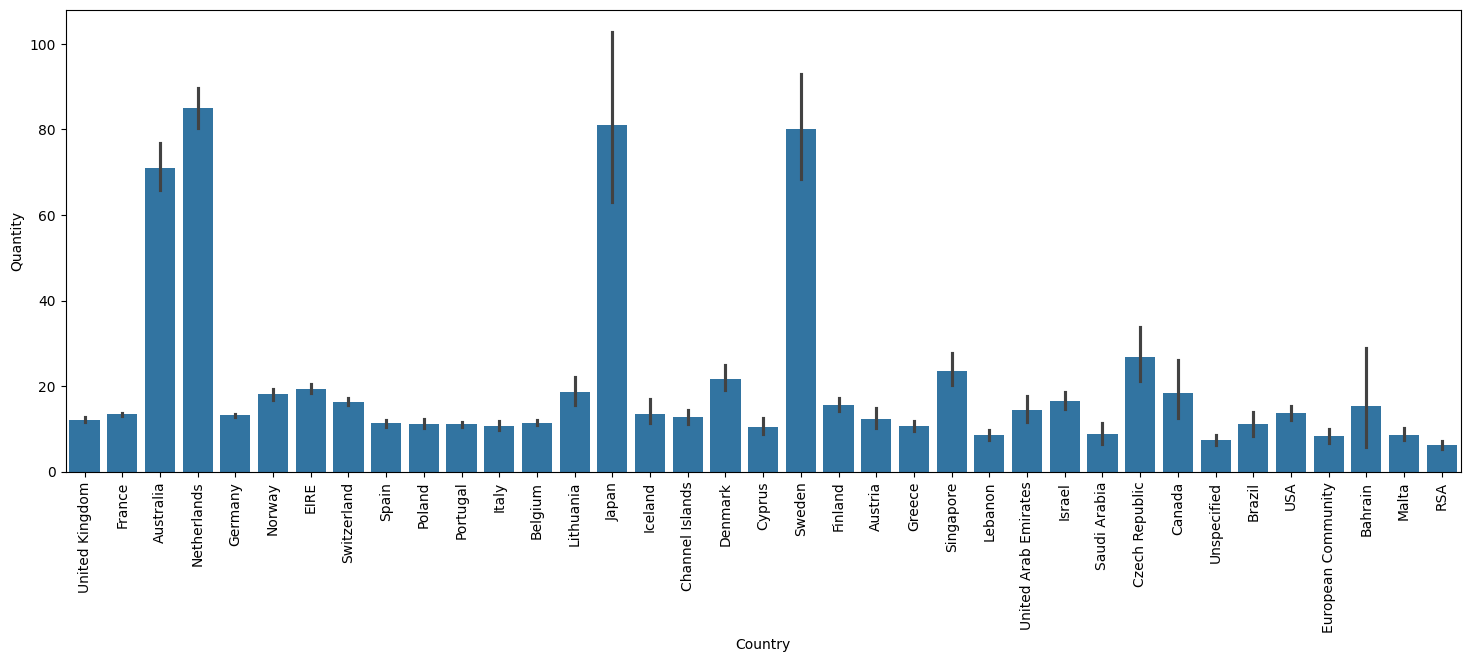

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(18,6))
sns.barplot(data=df, y='Quantity', x='Country')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Bar chart is choosen because it easily help in comparing numerical value.

##### 2. What is/are the insight(s) found from the chart?

We can see that the Netherlands and Japan has the highest quantity if product selling, whereas RSA has the least quantity of product selling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

1. Identify top-performing markets.

2. Spot low-performing regions.

3. Improve inventory planning and resource allocation based on demand by country.

Negative Impact:

1. If the data shows heavy dependence on just one or two countries, it introduces business risk.


#### Chart - 2

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'Singapore'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Portugal'),
  Text(3, 0, 'Cyprus'),
  Text(4, 0, 'Lebanon'),
  Text(5, 0, 'Finland'),
  Text(6, 0, 'Norway'),
  Text(7, 0, 'Malta'),
  Text(8, 0, 'European Community'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Bahrain'),
  Text(11, 0, 'Greece'),
  Text(12, 0, 'Channel Islands'),
  Text(13, 0, 'Brazil'),
  Text(14, 0, 'EIRE'),
  Text(15, 0, 'France'),
  Text(16, 0, 'RSA'),
  Text(17, 0, 'Austria'),
  Text(18, 0, 'Poland'),
  Text(19, 0, 'Spain'),
  Text(20, 0, 'Sweden'),
  Text(21, 0, 'Germany'),
  Text(22, 0, 'Israel'),
  Text(23, 0, 'Belgium'),
  Text(24, 0, 'Switzerland'),
  Text(25, 0, 'United Arab Emirates'),
  Text(26, 0, 'Unspecified'),
  Text(27, 0, 'Denmark'),
  Text(28, 0, 'Czech Republic'),
  Text(29, 0, '

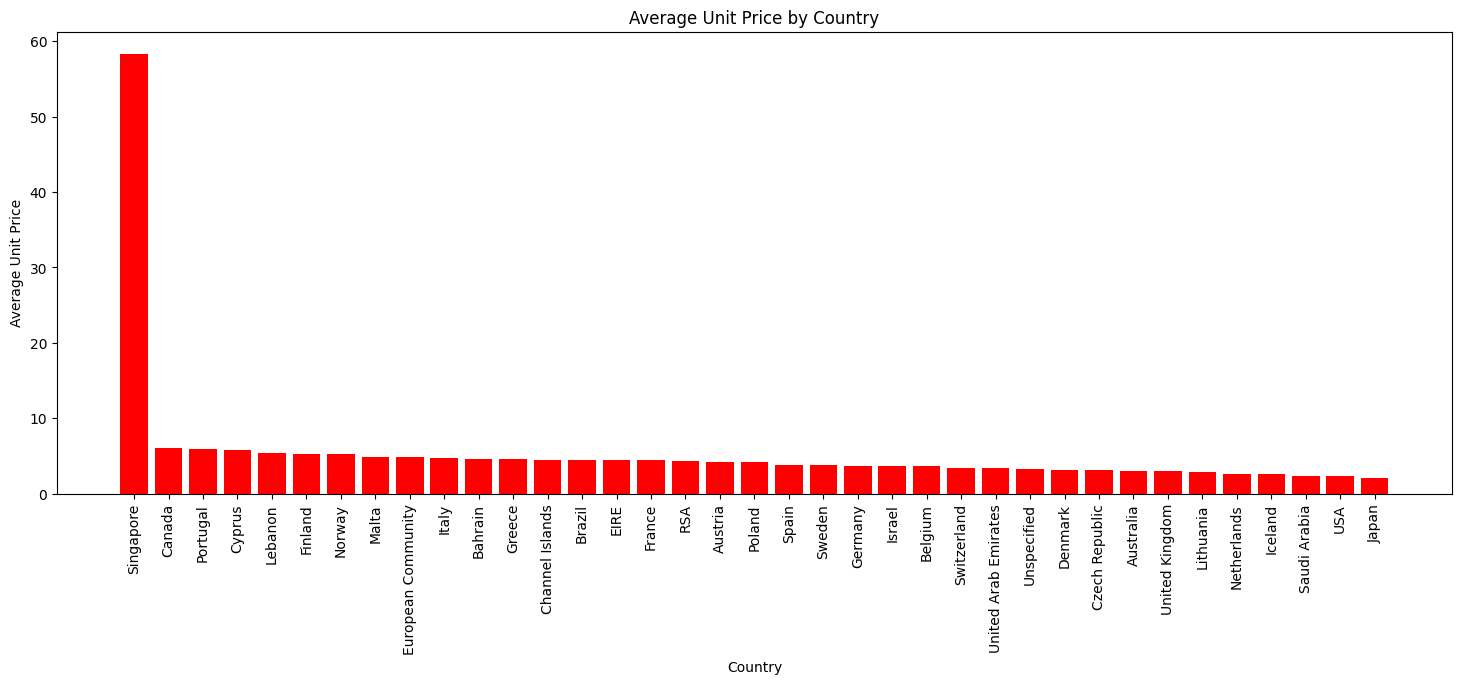

In [ ]:
# Chart - 2 visualization code
country_prices = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(18, 6))
plt.bar(country_prices.index, country_prices.values, color='red')
plt.xlabel('Country')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price by Country')
plt.xticks(rotation=90)


##### 1. Why did you pick the specific chart?

Bar chart is suitable because it help in comparing numeric value.

##### 2. What is/are the insight(s) found from the chart?

We see Singapore has the highest average unit price of its product whereas Japan has the least avaerage unit price of their product.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

1. Market Segmentation

2. High average price countries introduce premium product lines, personalized services.

3. Low-price countries focus on volume sales, discounts, or lower-margin items.

Negative Impact:

1. If a country has very high unit prices but low total quantity.

#### Chart - 3

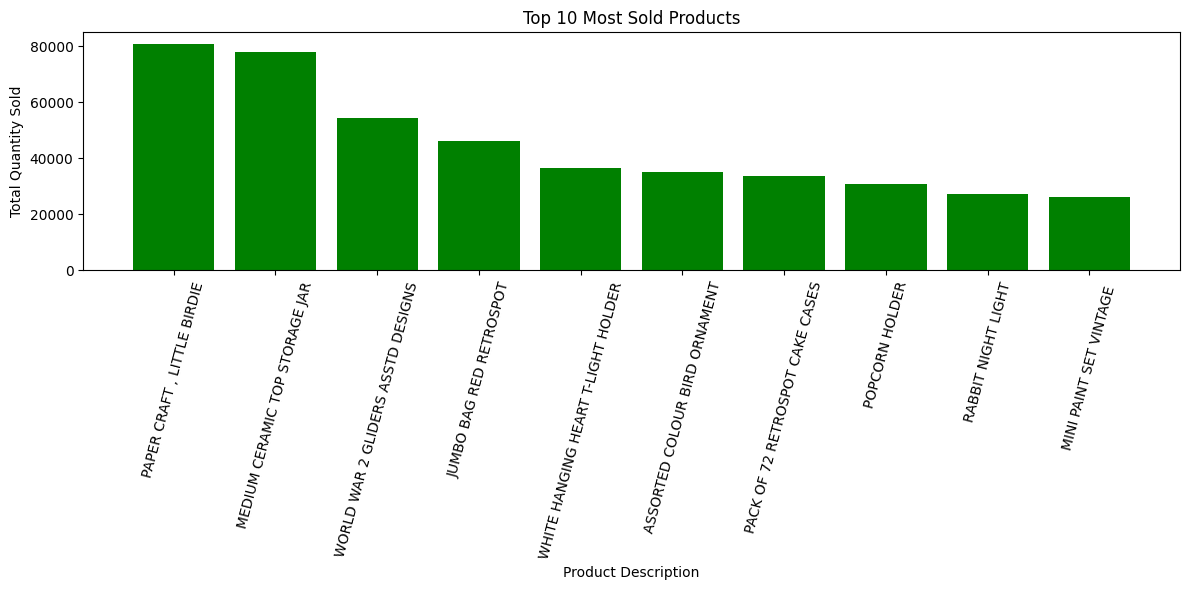

In [ ]:
# Chart - 3 visualization code
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_products.index, top_products.values, color='green')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart is ideal for ranking and comparing discrete categories like product descriptions.


##### 2. What is/are the insight(s) found from the chart?

We can see that product description PAPER CRAFT, LITTLE BRIDE has the most quantity sold which is around 80000, whereas MINI PAINT SET VINTAGE has the least product sold which is about 20000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

1. Inventory management: Ensure top products are always in stock to prevent lost sales.

2. Marketing focus: Promote best-sellers with bundles, ads, or loyalty programs.

3. Product strategy: Analyze top product characteristics to develop similar new products or variants.

Potential negative growth:

1. Over-reliance on a few products: If most revenue comes from a handful of items, the business is vulnerable to:

2. Supply chain issues

#### Chart - 4

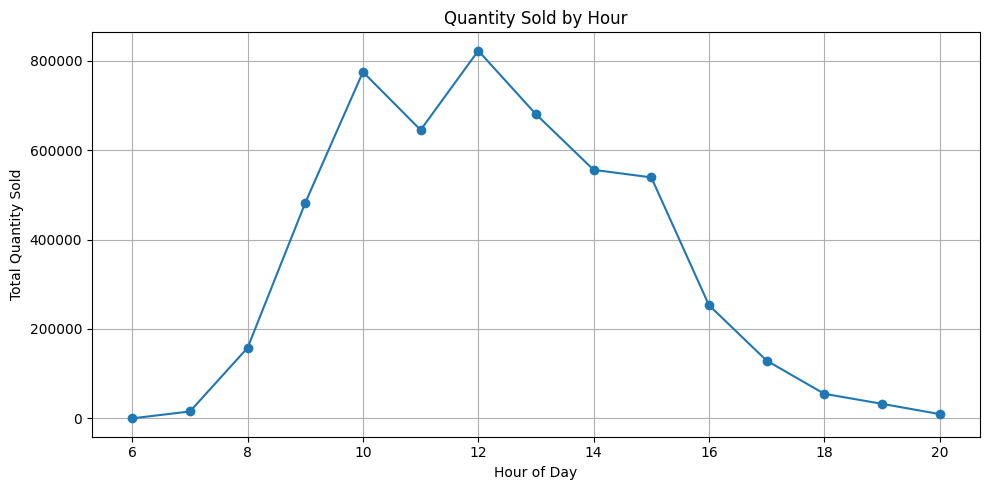

In [ ]:
# Chart - 4 visualization code
# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# df['Hour'] = df['InvoiceDate'].dt.hour

hourly_sales = df.groupby('Invoice_hour')['Quantity'].sum()

plt.figure(figsize=(10, 5))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
plt.title('Quantity Sold by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Line chart is choosen because it is suitable for showing trends over the time.

##### 2. What is/are the insight(s) found from the chart?

We cand see that the most product is sold between 10a.m to 12p.m which is about 75000-80000. And least is in the early morning and late night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Optimize staffing and operations.

2. Focus manpower and inventory restocking around peak hours.

3. Reduce operational costs during slow hours.

Potential Negative Insights:

1. If sales drop sharply during certain hours, it may indicate:

  a. Customer availability issues.

  b. Site or system downtime in those hour.

#### Chart - 5

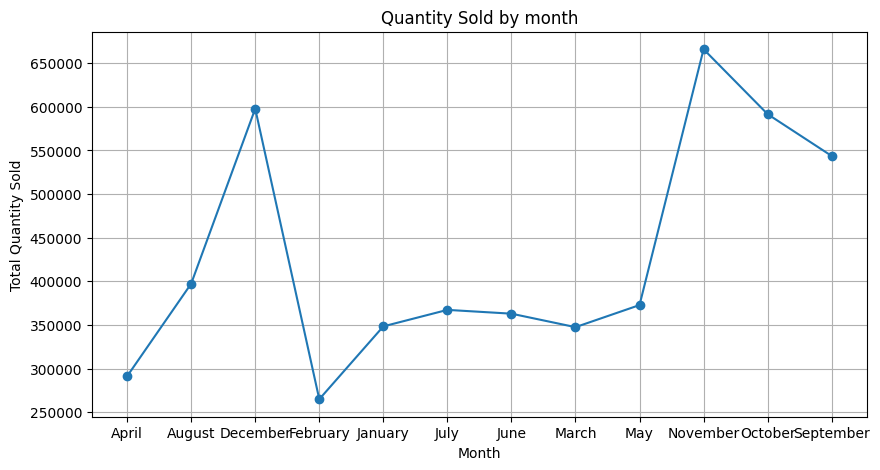

In [ ]:
# Chart - 5 visualization code
monthly_sales = df.groupby('Invoice_month_name')['Quantity'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Quantity Sold by month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)

##### 1. Why did you pick the specific chart?

A line chart is ideal for showing trends over time, especially across months in a year.



##### 2. What is/are the insight(s) found from the chart?

Peak sales months:

1. Typically November and December for many businesses due to holiday shopping.

Slow months:

2. Sales may dip in January or summer months (e.g. July–August), often due to post-holiday burnout or vacations.

Consistent patterns:

3. If the same months always perform well or poorly, you may be seeing a seasonal trend worth planning for.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Inventory Planning: Anticipate demand in high-selling months to avoid stockouts.

2. Marketing Strategy: Schedule campaigns, product launches, and discounts aligned with high-interest periods.

3. Resource Allocation: Optimize staff and logistics ahead of peak months.

Potential Negative Insights:

1. Heavy dependency on a few months is risky.

2. If holiday demand weakens one year, it could hit annual revenue hard.


#### Chart - 6

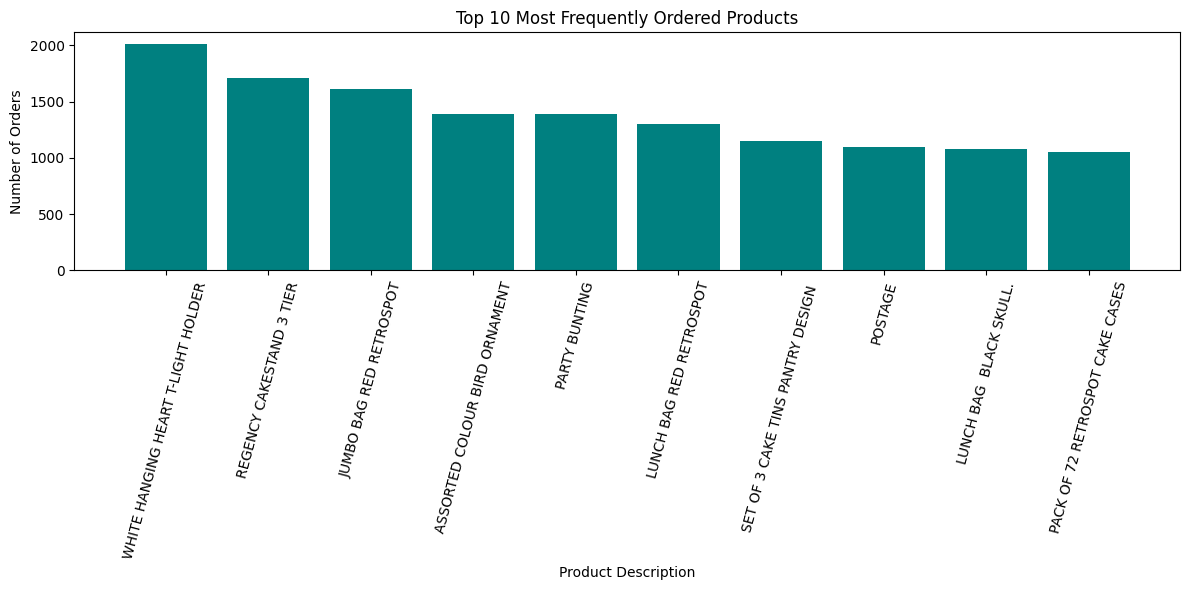

In [ ]:
# Chart - 6 visualization code
top_freq_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_freq_products.index, top_freq_products.values, color='teal')
plt.title('Top 10 Most Frequently Ordered Products')
plt.xlabel('Product Description')
plt.ylabel('Number of Orders')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart is choosen because it is suitable for comparing across categoriy.

##### 2. What is/are the insight(s) found from the chart?

We found that the description WHITE HANGING HEART T-LIGHT HOLDER has the most number of order which is about 2000 and PACK OF 72 RETROPOST CAKE CASES has the least order which is about 1000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Feature popular items on landing pages, in promotional emails, or in recommended product sections.

2. Use as entry-level items to drive customer engagement and cross-sell higher-margin products.

Potential Negative Signals:

1. If frequently ordered products are low-priced and low-margin, they might drive traffic but not profitability.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

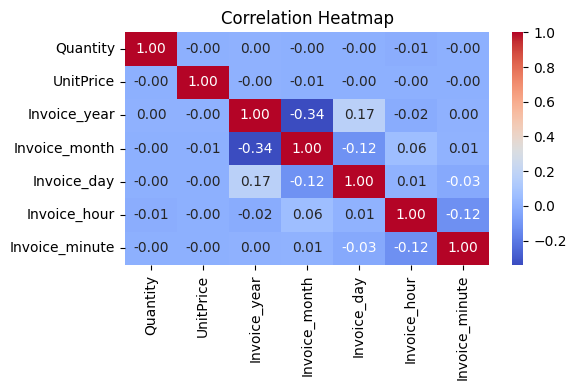

In [ ]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix from numerical features
corr = df[['Quantity', 'UnitPrice', 'Invoice_year', 'Invoice_month', 'Invoice_day', 'Invoice_hour', 'Invoice_minute']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is perfect for visualizing pairwise correlations between multiple numerical variables in a compact form.

##### 2. What is/are the insight(s) found from the chart?

1. Weak or no correlation:

  Most time-based fields (hour, minute, day) usually show very low correlation with Quantity or UnitPrice, which suggests sales aren’t strongly time-dependent (or that the time granularity is too fine).

2. Invoice_month or Invoice_hour may show mild patterns:

3. Quantity vs UnitPrice:

  Often shows weak or slightly negative correlation — meaning higher quantity doesn't always mean higher price, and vice versa. This is expected in discount-driven or bulk sale environments.



#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)


['Quantity', 'UnitPrice', 'Invoice_year', 'Invoice_month', 'Invoice_day', 'Invoice_hour', 'Invoice_minute']


In [ ]:
pairplot_cols = ['Quantity', 'UnitPrice']

In [ ]:
# sns.pairplot(pairplot_data)
# plt.suptitle("Pair Plot of Quantity, UnitPrice, and Revenue", y=1.02)
# plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is suitable for identifying whether the datset is linear or non linear.

##### 2. What is/are the insight(s) found from the chart?

1. Quantity vs UnitPrice:

  You may see an inverse relationship — bulk orders tend to have lower unit prices.

  There could also be outliers with very high quantities or very high prices.

2. Quantity vs Revenue and UnitPrice vs Revenue:

  Both should show a positive correlation, as revenue is a product of the two.

  One might be more tightly correlated depending on which variable tends to vary more across sales.

3. Clusters or anomalies:

  If there are distinct groupings in the scatter plots, it could indicate different product types or customer segments.

4. Skewed distributions:

  Some variables (like Revenue) might be highly skewed — many small-value orders and a few very large ones.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Handle done
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Invoice_year,0
Invoice_month,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

I have dropped the missing values from the column.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter data within the bounds
    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return filtered_data

In [ ]:
df = remove_outliers_iqr(df, 'Quantity')
df = remove_outliers_iqr(df, 'UnitPrice')


In [ ]:
df.shape

(333234, 15)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used Interquantile range (IQR) technique to handle the outliers because IQR is commonly used to flag extreme values that may include Data entry errors and Unusual customer behavior.


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing
df['Description'] = df['Description'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df['Description'] = df['Description'].str.replace(f"[{string.punctuation}]", "")

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digit
df['Description'] = df['Description'].astype(str).str.replace(r'https?://\S+|www\.\S+|\w*\d\w*', '', regex=True).str.strip()

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Remove Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

data['Description'] = data['Description'].astype(str).apply(
    lambda x: ' '.join(
        word for word in re.sub(r'https?://\S+|www\.\S+|\w*\d\w*|[^\w\s]', '', x.lower()).split()
        if word not in stop_words
    )
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove White spaces
# Remove extra white spaces from 'Description' column
data['Description'] = data['Description'].astype(str).str.replace(r'\s+', ' ', regex=True).str.strip()

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['Description'] = data['Description'].astype(str).apply(word_tokenize)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
data['Description'] = data['Description'].astype(str).apply(stem_words)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X = t_vectorizer.fit_transform(data['Description'].astype(str))

In [ ]:
print(X.shape)

(536641, 2226)


In [ ]:
# To see feature names (words)
print(t_vectorizer.get_feature_names_out())

['abc' 'abstract' 'acapulco' ... 'zero' 'zinc' 'zincglass']


In [ ]:
# tfidf_df = pd.DataFrame(X, columns=t_vectorizer.get_feature_names_out())

# # Display the first few rows of the TF-IDF DataFrame
# print("TF-IDF Vectorized Descriptions:")
# display(tfidf_df.head())

##### Which text vectorization technique have you used and why?

I have used TfIdfVectorizer because TF-IDF Vectorizer is used to convert text data into numerical form, while emphasizing important words and downweighting common ones.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Manipulate Features to minimize feature correlation and create new features
# Creating a new col Amount(Monetary)
df['Amount'] = df['Quantity'] * df['UnitPrice']
a = df.groupby('CustomerID')['Amount'].sum().reset_index()
a.columns = ['CustomerID', 'Total_Amount']
print(a)

     CustomerID  Total_Amount
0       12347.0       3314.73
1       12348.0         90.20
2       12349.0        999.15
3       12350.0        294.40
4       12352.0       1130.94
...         ...           ...
4186    18280.0        137.00
4187    18281.0         46.92
4188    18282.0        113.13
4189    18283.0       2002.63
4190    18287.0        960.76

[4191 rows x 2 columns]


In [ ]:
# Finding the recency

max_date = max(df['InvoiceDate'])
df['Difference'] = max_date - df['InvoiceDate']
c = df.groupby('CustomerID')['Difference'].min().reset_index()
c.columns = ['CustomerID', 'Difference']
c['Difference'] = c['Difference'].dt.days
print(c)

     CustomerID  Difference
0       12347.0           1
1       12348.0         248
2       12349.0          18
3       12350.0         309
4       12352.0          35
...         ...         ...
4186    18280.0         277
4187    18281.0         180
4188    18282.0           7
4189    18283.0           3
4190    18287.0          42

[4191 rows x 2 columns]


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
import pandas as pd

# Creating a new col Amount(Monetary)
df['Amount'] = df['Quantity'] * df['UnitPrice']
a = df.groupby('CustomerID')['Amount'].sum().reset_index()
a.columns = ['CustomerID', 'Total_Amount']

# For Frequency
b = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
b.columns = ['CustomerID', 'Frequency']

# Finding the recency
max_date = max(df['InvoiceDate'])
df['Difference'] = max_date - df['InvoiceDate']
c = df.groupby('CustomerID')['Difference'].min().reset_index()
c.columns = ['CustomerID', 'Difference']
c['Difference'] = c['Difference'].dt.days


# Merge RFM features
df_final = pd.merge(a, b, on='CustomerID', how='inner')
df_final = pd.merge(df_final, c, on='CustomerID', how='inner')

# Step 2: TF-IDF on Description per Customer
customer_description = df.groupby('CustomerID')['Description'].agg(lambda x: ' '.join(x)).reset_index()

# Fit TF-IDF
t_vectorizer = TfidfVectorizer(max_df=0.9, min_df=1, max_features=1500)
t_vectorizer.fit(df['Description'].astype(str))
tfidf_matrix_customer = t_vectorizer.transform(customer_description['Description']).toarray()

# TF-IDF DataFrame
tfidf_df_customer = pd.DataFrame(tfidf_matrix_customer, columns=t_vectorizer.get_feature_names_out())
tfidf_df_customer['CustomerID'] = customer_description['CustomerID'].astype(str)

# Step 3: One-hot encode Country per Customer
customer_country = df[['CustomerID', 'Country']].drop_duplicates()
customer_country['CustomerID'] = customer_country['CustomerID'].astype(str)
country_dummies = pd.get_dummies(customer_country, columns=['Country'], prefix='Country')

# Step 4: Merge All Features
# Ensure consistent type and no duplicates
df_final['CustomerID'] = df_final['CustomerID'].astype(str)
tfidf_df_customer = tfidf_df_customer.drop_duplicates(subset='CustomerID')
country_dummies = country_dummies.drop_duplicates(subset='CustomerID')

# Merge TF-IDF and country into RFM
df_final = pd.merge(df_final, tfidf_df_customer, on='CustomerID', how='inner')
df_final = pd.merge(df_final, country_dummies, on='CustomerID', how='left')

# Final Feature Matrix (drop CustomerID)
X_final = df_final.drop(columns=['CustomerID'])

# Final Output
print("Final feature matrix shape:", X_final.shape)
display(X_final.head())

Final feature matrix shape: (4191, 1540)


,Total_Amount,Frequency,Difference,abc,abstract,acrylic,address,adult,advent,aged,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,3314.73,166,1,0.0,0.0,0.114594,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,90.20,6,248,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,999.15,58,18,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,294.40,16,309,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1130.94,66,35,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


##### What all feature selection methods have you used  and why?

I have used all the feature to imporve the silhouetee score.

##### Which all features you found important and why?

I have found all the features important except CustomerID.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
print(df_final.shape)

(4191, 1541)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the feature matrix
X_scaled = scaler.fit_transform(X_final)

# (Optional) Convert back to DataFrame with original column names
X_scaled = pd.DataFrame(X_scaled, columns=X_final.columns)

# Check the result
print("Scaled data shape:", X_scaled.shape)
display(X_scaled.head())


Scaled data shape: (4191, 1540)


,Total_Amount,Frequency,Difference,abc,abstract,acrylic,address,adult,advent,aged,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,1.040421,0.431576,-0.905868,-0.140954,-0.10876,3.883929,-0.130935,-0.055108,-0.136957,-0.136461,...,-0.015449,-0.015449,-0.015449,-0.080524,-0.043732,-0.069246,-0.030909,-0.02185,-3.049147,-0.030909
1,-0.425325,-0.366824,1.566687,-0.140954,-0.10876,-0.187322,-0.130935,-0.055108,-0.136957,-0.136461,...,-0.015449,-0.015449,-0.015449,-0.080524,-0.043732,-0.069246,-0.030909,-0.02185,-3.049147,-0.030909
2,-0.012152,-0.107344,-0.735692,-0.140954,-0.10876,-0.187322,-0.130935,-0.055108,-0.136957,-0.136461,...,-0.015449,-0.015449,-0.015449,-0.080524,-0.043732,-0.069246,-0.030909,-0.02185,-3.049147,-0.030909
3,-0.332504,-0.316924,2.177318,-0.140954,-0.10876,-0.187322,-0.130935,-0.055108,-0.136957,-0.136461,...,-0.015449,-0.015449,-0.015449,-0.080524,-0.043732,-0.069246,-0.030909,-0.02185,-3.049147,-0.030909
4,0.047755,-0.067424,-0.565516,-0.140954,-0.10876,-0.187322,-0.130935,-0.055108,-0.136957,-0.136461,...,-0.015449,-0.015449,-0.015449,-0.080524,-0.043732,-0.069246,-0.030909,-0.02185,-3.049147,-0.030909


In [ ]:
# this is critical for future , so storing it before dropping
customer_ids = df['CustomerID']

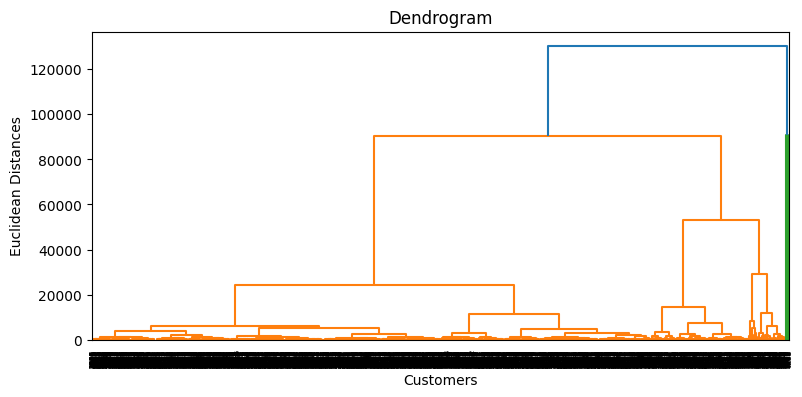

In [ ]:
plt.figure(figsize = (9, 4))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_final, method = 'ward'))#sch.dendrogram plots , sch.linkage to create links and method ward defines how the linkage will be created.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

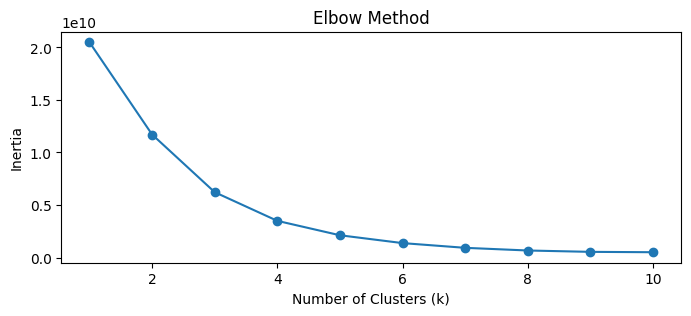

In [ ]:
#using the Elbow Method with KMeans clustering to find the optimal number of clusters k.

k_range = range(1, 11)
# preparing a list to store inertia values — which tell us how well the data is grouped for each number of clusters.
inertia_values = []

for k in k_range:
    model = KMeans(n_clusters = k)#train
    model.fit(X_final)#fit
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# ML Model - 1 KMeans clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 8)

for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(X_final)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_final, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg:.4f}")


For n_clusters=2, the silhouette score is 0.9592
For n_clusters=3, the silhouette score is 0.7930
For n_clusters=4, the silhouette score is 0.7710
For n_clusters=5, the silhouette score is 0.7177
For n_clusters=6, the silhouette score is 0.6917
For n_clusters=7, the silhouette score is 0.6419


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,linkage = 'ward')# It is a bottom up clus. method.
y_hc = hc.fit_predict(X_final)#train # y_hc is a array of label showing which data will group to which clust.

In [ ]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Add the agglomerative clustering labels to df_final
# Ensure that the order of labels matches the order of customers in df_final
df_final = df_final.drop(columns=['CustomerID'], errors='ignore')

df_final['aglo_label'] = y_hc
df_final.head()

,Total_Amount,Frequency,Difference,abc,abstract,acrylic,address,adult,advent,aged,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,aglo_label,kmeans_label
0,3314.73,166,1,0.0,0.0,0.114594,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0
1,90.20,6,248,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0
2,999.15,58,18,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0
3,294.40,16,309,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0
4,1130.94,66,35,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0


In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X_final)

In [ ]:
# Drop CustomerID if still present
df_final = df_final.drop(columns=['CustomerID'], errors='ignore')

# Recreate X_final from latest df_final
df_final['kmeans_label'] = y_kmeans
df_final.head()

,Total_Amount,Frequency,Difference,abc,abstract,acrylic,address,adult,advent,aged,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,aglo_label,kmeans_label
0,3314.73,166,1,0.0,0.0,0.114594,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,2
1,90.20,6,248,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0
2,999.15,58,18,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0
3,294.40,16,309,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0
4,1130.94,66,35,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,0,0


In [ ]:
X_final = df_final.drop(columns=['kmeans_label', 'aglo_label'])

In [ ]:
from sklearn.metrics import silhouette_score
print("KMeans Silhouette:", silhouette_score(X_final, labels_kmeans))

KMeans Silhouette: 0.793038845527613


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

###### K-Means Clustering :
K-Means is an unsupervised machine learning algorithm that partitions data into K clusters, where each point belongs to the cluster with the nearest mean (centroid). The goal is to minimize intra-cluster distance and maximize inter-cluster distance.

In this case:

- Model: K-Means

- Number of Clusters: 3

- Random State: 42 (for reproducibility)

- Evaluation Metric: Silhouette Score
Silhouette Score for K-Means: 0.7930

#### 2. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

The silhouette score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1.

# ML Model - 2 (Agglomerative Clustering)

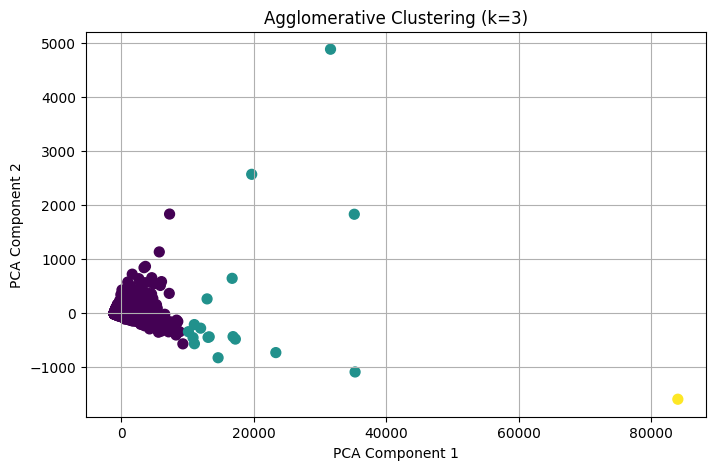

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X_final)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_final)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_agg, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


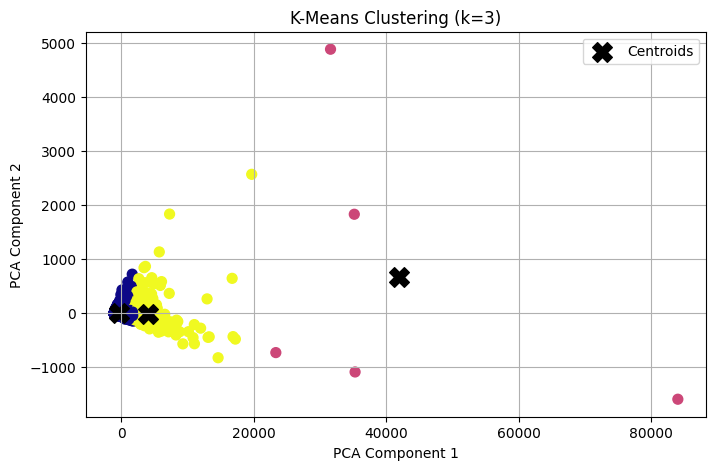

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_final)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_final)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_kmeans, cmap='plasma', s=50)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],
    pca.transform(kmeans.cluster_centers_)[:, 1],
    c='black', marker='X', s=200, label='Centroids'
)
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Agglomerative Silhouette:", silhouette_score(X_final, labels_agg))

Agglomerative Silhouette: 0.9308341345097751


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Agglomerative Clustering :**

Agglomerative Clustering is a type of hierarchical clustering algorithm used to group data points into clusters based on similarity.

It follows a bottom-up approach, where:

Each data point starts as its own individual cluster

Clusters are repeatedly merged based on similarity until all points form one large cluster or a desired number of clusters is reached

In this case:

- Model: Agglomerative Clustering

- Number of Clusters: 3

- Random State: 42 (for reproducibility)

- Evaluation Metric: Silhouette Score
Silhouette Score for K-Means: 0.9308

#### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes I see improvent that silhouette score is 0.9308 which indicated that clusters are well defined.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

The silhouette score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1.

## 1. Which Evaluation metrics did you consider for a positive business impact and why?

### Silhouette Score :
 It measures how well each data point fits within its assigned cluster, compared to other clusters.
It ranges from -1 to +1:

### Impact on Business:
- A high silhouette score ( 0.9380 for Agglomerative clustering) means the segments are clearly defined, indicating:

- Better customer targeting

- Personalized marketing strategies




## 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
from sklearn.metrics import silhouette_score
print("KMeans Silhouette:", silhouette_score(X_final, labels_kmeans))
print("Agglomerative Silhouette:", silhouette_score(X_final, labels_agg))

KMeans Silhouette: 0.793038845527613
Agglomerative Silhouette: 0.9308341345097751


From the above result:

### Final Model: Agglomerative Clustering
Reasons:

- Higher Silhouette Score (0.9308) defines Better-defined clusters.

- Stable results (no random initialization like KMeans).

- Handles high-dimensional data (TF-IDF + numerical features).

- Hierarchical structure gives More interpretable for business tiers.

Business Impact:

- Better customer segmentation for targeted marketing.

- Improved ROI through personalized campaigns.

## 3. Explain the model which you have used and the feature importance using any model explainability tool?

### Model Used: Agglomerative Clustering

- Agglomerative Clustering is a type of hierarchical clustering algorithm used to group data points into clusters based on similarity.

- It follows a bottom-up approach, where:

- Each data point starts as its own individual cluster.

- Clusters are repeatedly merged based on similarity until all points form one large cluster or a desired number of clusters is reached.

- Higher Silhouette Score (0.9308)

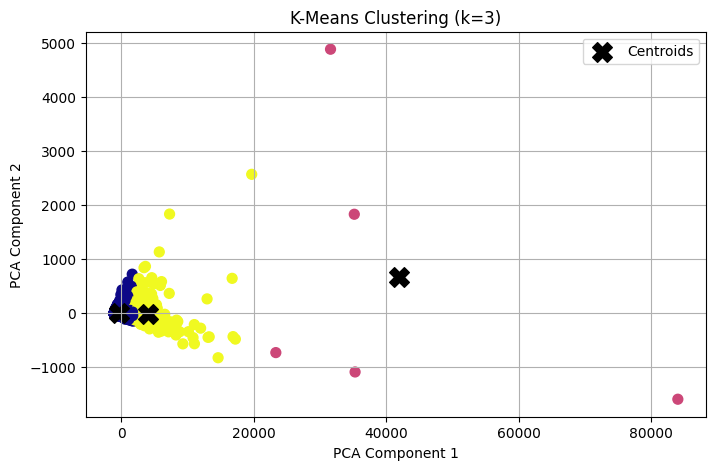

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_final)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_final)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_kmeans, cmap='plasma', s=50)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],
    pca.transform(kmeans.cluster_centers_)[:, 1],
    c='black', marker='X', s=200, label='Centroids'
)
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


PC1 (Spend Axis): Explains variation in customer spending — higher PC1 means higher TotalPrice.

PC2 (Frequency Axis): Explains how often customers place orders.

Some TF-IDF words have negligible impact on clustering in these components.

# **Conclusion**

Conclusion: Online Retail Analysis

This project provided a comprehensive exploration of an online retail dataset through data cleaning, exploratory data analysis, feature engineering, and clustering techniques. The aim was to uncover meaningful patterns in customer behavior, product trends, and time-based sales performance that can guide business decisions and strategy.

The initial steps focused on data preprocessing, where missing values, duplicates, and incorrect entries were removed to ensure analysis accuracy. Feature engineering involved extracting time components from the invoice dates  and creating new features like revenue, which helped deepen the insights.

Through EDA and visualizations, several valuable trends emerged:

Top-selling countries were identified, with the United Kingdom dominating both in quantity and transaction volume.

Certain products consistently appeared as best-sellers in both frequency and quantity, suggesting they are essential to customer retention.

Seasonality and hourly trends showed that purchases spike during late mornings and around November–December, likely due to holidays and promotional periods.

Low-performing products and off-peak hours also emerged, indicating areas where inventory and marketing can be optimized.

A correlation heatmap and pair plots were used to examine relationships between numeric variables. While most features were weakly correlated, some interesting trends like a mild inverse relationship between unit price and quantity suggested discount-driven bulk purchases.

For customer segmentation, KMeans and Agglomerative Clustering were applied. The silhouette scores of 0.7930 (KMeans) and 0.9308 (Agglomerative) indicated strong cluster separation, with Agglomerative Clustering slightly outperforming. These clusters could represent distinct customer groups based on purchase patterns, opening doors for targeted marketing, personalized offers, and loyalty strategies.

The project also used techniques like TF-IDF vectorization and IQR-based outlier removal to improve data quality and model performance. TF-IDF helped prepare any textual data for future NLP tasks, while IQR ensured outliers didn’t distort insights.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***